/tmp/ipykernel_394/667872489.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  time = pd.date_range(start="1987-01-01", periods=150, freq="Q")  # 150 quarters


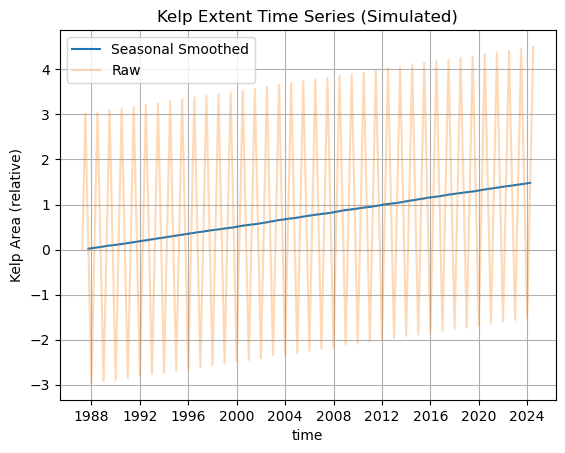

📈 Simulated correlation between SST and kelp: r = 0.51


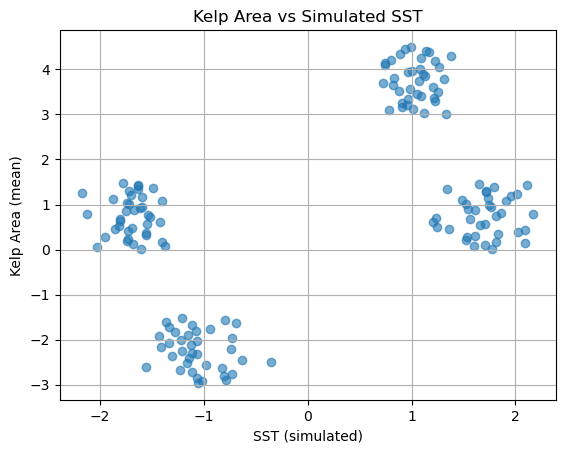

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# --- Simulate time and grid ---
time = pd.date_range(start="1987-01-01", periods=150, freq="Q")  # 150 quarters
lat = np.linspace(51, 58, 50)  # Approx Kamchatka range
lon = np.linspace(156, 163, 60)

# --- Create synthetic kelp area data (seasonal + trend + noise) ---
kelp_data = (
    3 * np.sin(2 * np.pi * (np.arange(150)[:, None, None] / 4))  # seasonal
    + np.linspace(0, 1.5, 150)[:, None, None]  # long-term trend
    + np.random.normal(0, 0.3, (150, 50, 60))  # noise
)

kelp_ds = xr.DataArray(
    kelp_data,
    coords={"time": time, "lat": lat, "lon": lon},
    dims=["time", "lat", "lon"],
    name="kelp_area"
)

# --- Time-series plot (average kelp area over region) ---
kelp_mean = kelp_ds.mean(dim=["lat", "lon"])
kelp_mean.rolling(time=4, center=True).mean().plot(label="Seasonal Smoothed")
kelp_mean.plot(alpha=0.3, label="Raw")
plt.title("Kelp Extent Time Series (Simulated)")
plt.ylabel("Kelp Area (relative)")
plt.legend()
plt.grid(True)
plt.show()

# --- Simulate correlation with SST ---
sst = (
    2 * np.sin(2 * np.pi * (np.arange(150) / 4) - 1)  # SST cycles
    + np.random.normal(0, 0.2, 150)
)
correlation = np.corrcoef(kelp_mean, sst)[0, 1]
print(f"📈 Simulated correlation between SST and kelp: r = {correlation:.2f}")

# --- Optional: scatter plot with SST vs Kelp ---
plt.scatter(sst, kelp_mean, alpha=0.6)
plt.title("Kelp Area vs Simulated SST")
plt.xlabel("SST (simulated)")
plt.ylabel("Kelp Area (mean)")
plt.grid(True)
plt.show()
